<a href="https://colab.research.google.com/github/ehsankarami1358/ImagingSVHN/blob/main/Step_by_Step_LSTM_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

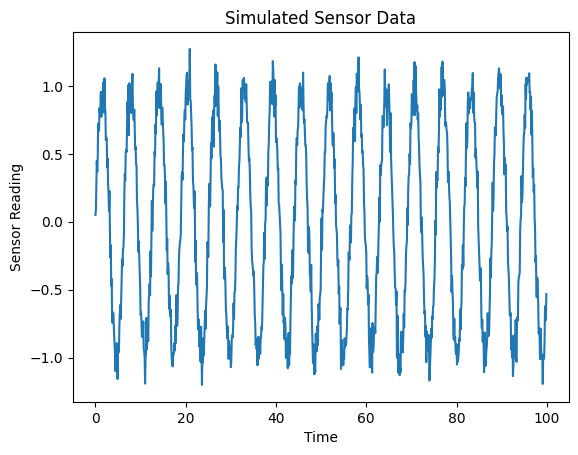

In [ ]:
# Simulated sine wave with noise (like temperature/vibration)
np.random.seed(42)
time = np.arange(0, 100, 0.1)
data = np.sin(time) + np.random.normal(0, 0.1, len(time))  # Noisy sine wave

plt.plot(time, data)
plt.title("Simulated Sensor Data")
plt.xlabel("Time")
plt.ylabel("Sensor Reading")
plt.show()

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Create sequences (e.g., last 20 values → predict next one)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 20
X, y = create_sequences(data_scaled, seq_len)

# Reshape for LSTM: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
 model = Sequential([
   LSTM(50, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1832
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0369
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0259
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


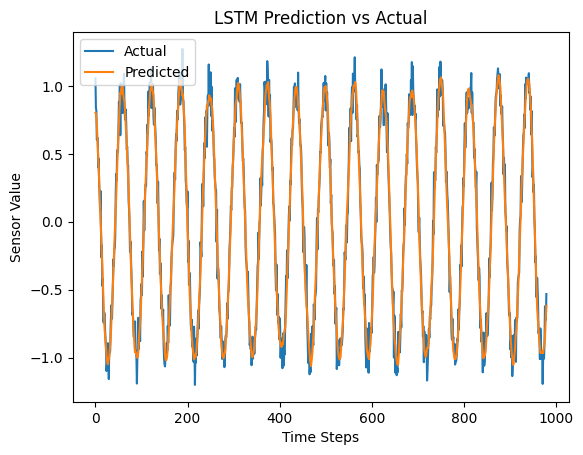

In [ ]:
predictions = model.predict(X)
predicted = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y)

# Plot predicted vs actual
plt.plot(actual, label="Actual")
plt.plot(predicted, label="Predicted")
plt.title("LSTM Prediction vs Actual")
plt.xlabel("Time Steps")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()